In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import os
import warnings; warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

In [2]:
df = pd.read_csv('sales_data.csv')
df['date'] = pd.to_datetime(df['date'])
df[['unit_price','discount','total_price','quantity']] = df[['unit_price','discount','total_price','quantity']].apply(pd.to_numeric, errors='coerce')
df.head()

,sale_id,date,product,category,quantity,unit_price,discount,total_price,customer_id,region,payment_method
0,1,2025-01-01,Widget A,Widgets,1,19.99,0.0,19.99,CUST1001,North,Credit Card
1,2,2025-01-02,Widget B,Widgets,2,24.50,1.5,47.50,CUST1002,South,PayPal
2,3,2025-01-03,Gadget C,Gadgets,3,9.99,3.0,26.97,CUST1003,East,Cash
3,4,2025-01-04,Gadget D,Gadgets,4,14.75,4.5,54.50,CUST1004,West,Wire
4,5,2025-01-05,Thingamajig E,Thingamajigs,5,49.99,0.0,249.95,CUST1005,North,Credit Card


In [3]:
df.isnull().sum()
df.describe(include='all')

,sale_id,date,product,category,quantity,unit_price,discount,total_price,customer_id,region,payment_method
count,100.000000,100,100,100,100.000000,100.000000,100.0000,100.000000,100,100,100
unique,NaN,NaN,8,5,NaN,NaN,NaN,NaN,100,4,4
top,NaN,NaN,Widget A,Widgets,NaN,NaN,NaN,NaN,CUST1001,North,Credit Card
freq,NaN,NaN,13,26,NaN,NaN,NaN,NaN,1,25,25
mean,50.500000,2025-02-19 12:00:00,NaN,NaN,3.000000,19.642700,2.2500,57.096700,NaN,NaN,NaN
min,1.000000,2025-01-01 00:00:00,NaN,NaN,1.000000,3.250000,0.0000,0.250000,NaN,NaN,NaN
25%,25.750000,2025-01-25 18:00:00,NaN,NaN,2.000000,9.990000,1.1250,16.980000,NaN,NaN,NaN
50%,50.500000,2025-02-19 12:00:00,NaN,NaN,3.000000,17.370000,2.2500,39.865000,NaN,NaN,NaN
75%,75.250000,2025-03-16 06:00:00,NaN,NaN,4.000000,24.500000,3.3750,79.960000,NaN,NaN,NaN
max,100.000000,2025-04-10 00:00:00,NaN,NaN,5.000000,49.990000,4.5000,249.950000,NaN,NaN,NaN


In [4]:
total_sales = df['total_price'].sum()
sales_by_product = df.groupby('product')['total_price'].sum().sort_values(ascending=False)
sales_by_region = df.groupby('region')['total_price'].sum().sort_values(ascending=False)
top_customers = df.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(10)
total_sales, sales_by_product.head(10), sales_by_region, top_customers

(np.float64(5709.67),
 product
 Thingamajig E    1899.62
 Tool H            964.30
 Widget B          960.50
 Widget A          739.63
 Gadget D          546.25
 Gadget C          340.62
 Doohickey F       174.50
 Accessory G        84.25
 Name: total_price, dtype: float64,
 region
 North    2639.25
 West     1510.55
 South    1135.00
 East      424.87
 Name: total_price, dtype: float64,
 customer_id
 CUST1005    249.95
 CUST1045    249.95
 CUST1085    249.95
 CUST1029    199.96
 CUST1069    199.96
 CUST1053    149.97
 CUST1013    149.97
 CUST1093    149.97
 CUST1080    145.25
 CUST1040    145.25
 Name: total_price, dtype: float64)

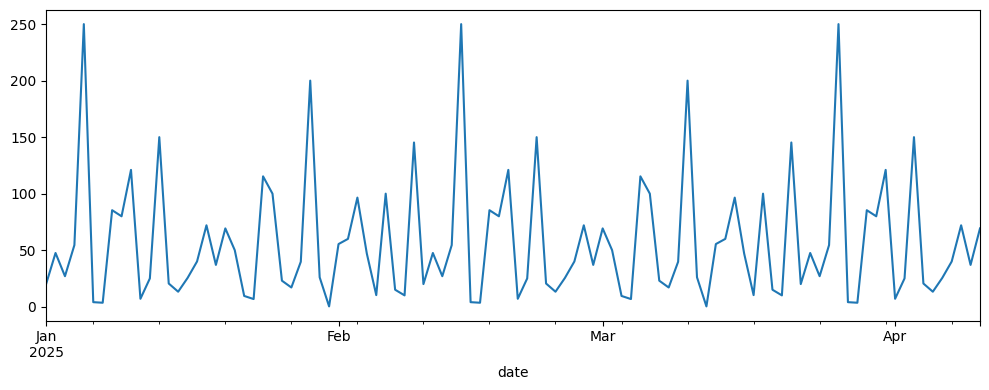

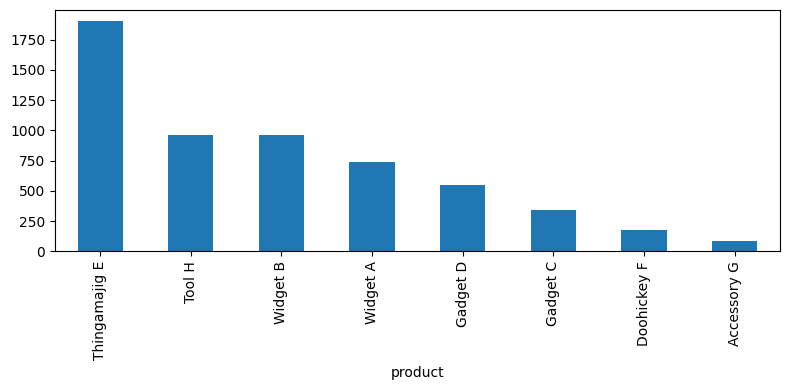

In [5]:
daily_sales = df.groupby('date')['total_price'].sum()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
daily_sales.plot()
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,4))
sales_by_product.head(10).plot(kind='bar')
plt.tight_layout()
plt.show()